Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pickle

Read the contents of the data

In [2]:
df = pd.read_csv("crop.csv")
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


Check for null values and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Check how many classes

In [4]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

Split the data into features and target

In [5]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
y = df[['Crop']]

Plot the features

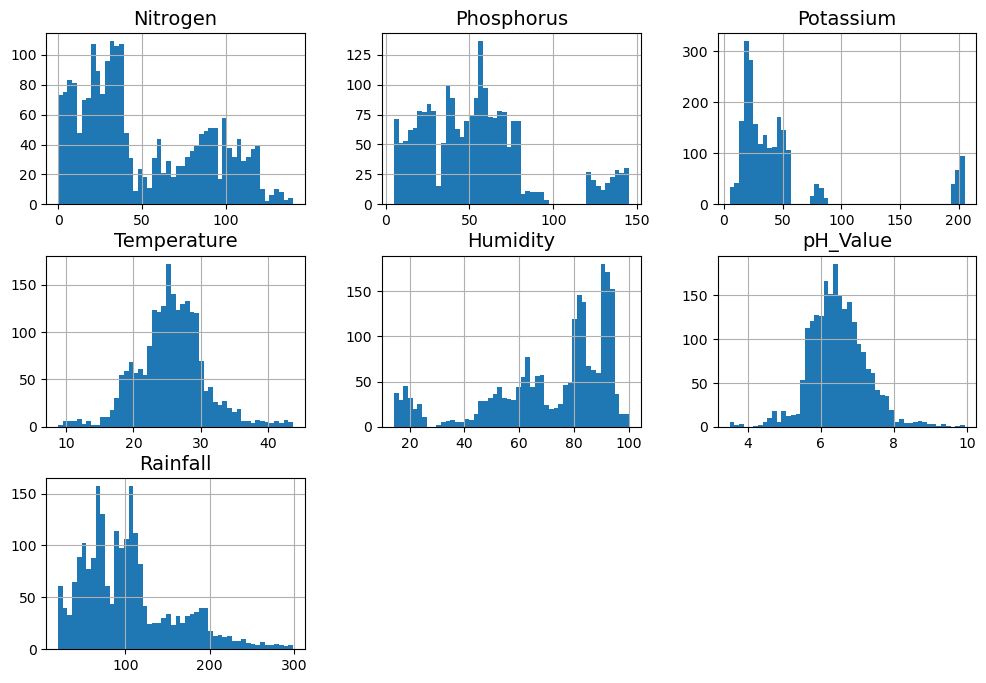

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X.hist(bins=50, figsize=(12, 8))
plt.show()

Encode the target and split the data into train and test set

In [7]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Created different pipeline algorithms and a voting classifier to select the best answer

In [8]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])
model = VotingClassifier(estimators=[
    ('svm', pipeline_svm),
    ('nb', pipeline_nb),
    ('rf', pipeline_rf)
], voting='soft')

fitted the model

In [9]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('classifier',
                                               SVC(probability=True,
                                                   random_state=42))])),
                             ('nb',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('classifier', GaussianNB())])),
                             ('rf',
                              Pipeline(steps=[('classifier',
                                               RandomForestClassifier(random_state=42))]))],
                 voting='soft')

Checked the model accuracy

In [10]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

0.9931818181818182


Save the trained model

In [11]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
with open('labelEncoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)